In [1]:
## import some modules between which also our HamFit_py

import HamF_py as hamf
from iminuit import Minuit
import numpy as np
import pyhf
import matplotlib.pyplot as plt
import modifier

/tmp/mcolonna/lb-conda/envs/env_test/etc/cling/std.modulemap:257:29: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "memory_resource" [optional] {
                            ^
/tmp/mcolonna/lb-conda/envs/env_test/etc/cling/std.modulemap:447:27: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/chrono.h" [optional] {
                          ^
/tmp/mcolonna/lb-conda/envs/env_test/etc/cling/std.modulemap:531:41: warning: unknown attribute 'optional' [-Wignored-attributes]
  explicit module "bits_ranges_base_h" [optional] {
                                        ^
/tmp/mcolonna/lb-conda/envs/env_test/etc/cling/std.modulemap:538:32: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/ranges_util.h" [optional] {
                               ^
/tmp/mcolonna/lb-conda/envs/env_test/etc/cling/std.modulemap:559:40: warning: unknown attribute 'optional' [-Wignored-attributes]
  module "bits/uses_allocator_args.h" [optio

Welcome to JupyROOT 6.28/04


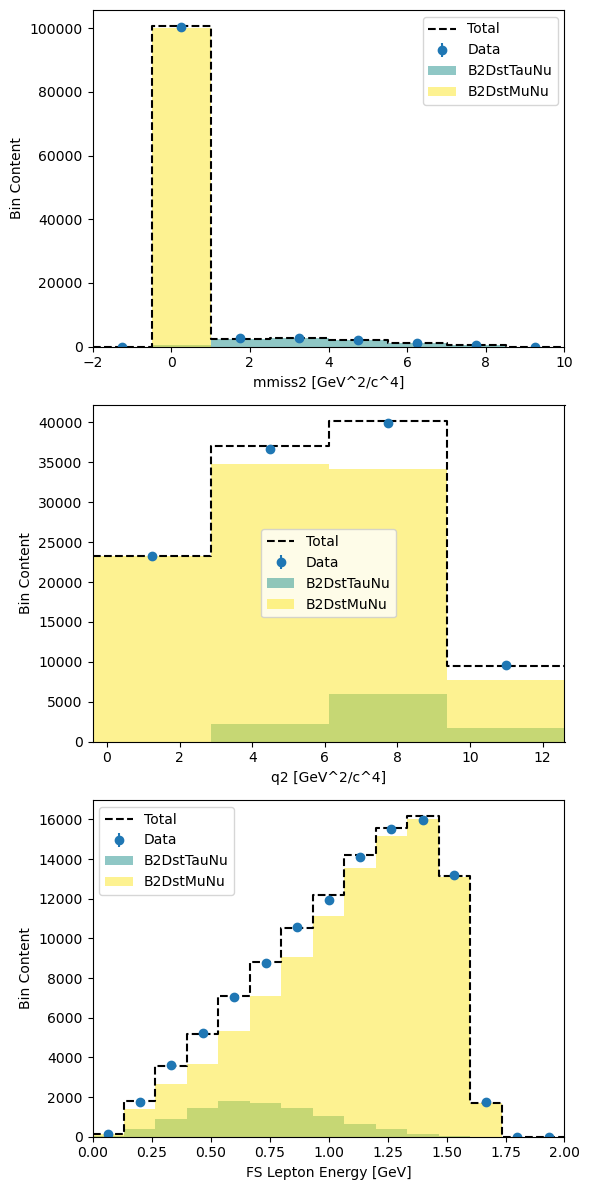

In [2]:
# create the fitter 
# not yet optimized for the pyhf interface
# all the information necessary is stored in a fitter even if it is not (yet) trivial to retrieve

reader = hamf.Reader("B02DstTauNu_TauMu.config")
fitter = reader.createFitter()

params = {"SM" : 1., "Re_S_qLlL" : -0., "Im_S_qLlL" : 0. , "Re_S_qRlL" : 0., "Im_S_qRlL" : 0.,  "Re_V_qLlL" : 0., "Im_V_qLlL" : 0. , "Re_V_qRlL" : 0., "Im_V_qRlL" : 0., "Re_T_qLlL" : 0.0, "Im_T_qLlL" : +0., "delta_RhoSq" : 0.0, "delta_cSt" : 0.0, "delta_chi21" : 0., "delta_chi2p" : 0., "delta_chi3p" : 0., "delta_eta1" : 0., "delta_etap" : 0., "delta_phi1p" : 0., "delta_beta21" : 0., "delta_beta3p" : 0.,"lumi" : 1.}
fitter.plot(**params)

In [3]:
# Definition of the nominal and the alternative models for the pyhf test

def SM_dist_sgnl():
    params_SM = {"SM" : 1., "Re_S_qLlL" : -0., "Im_S_qLlL" : 0. , "Re_S_qRlL" : 0., "Im_S_qRlL" : 0.,  "Re_V_qLlL" : 0., "Im_V_qLlL" : 0. , "Re_V_qRlL" : 0., "Im_V_qRlL" : 0., "Re_T_qLlL" : 0.0, "Im_T_qLlL" : +0., "delta_RhoSq" : 0.0, "delta_cSt" : 0.0, "delta_chi21" : 0., "delta_chi2p" : 0., "delta_chi3p" : 0., "delta_eta1" : 0., "delta_etap" : 0., "delta_phi1p" : 0., "delta_beta21" : 0., "delta_beta3p" : 0.,"lumi" : 1.}
    res = fitter._template_list[0].generate_template(**params_SM) + fitter._template_list[1].generate_template(**params_SM)
    return res
def NP_dist_sgnl(**kwargs):
    params_NP = {"SM" : kwargs["SM"], "Re_S_qLlL" : kwargs["Re_S_qLlL"], "Im_S_qLlL" : kwargs["Im_S_qLlL"], "Re_S_qRlL" : kwargs["Re_S_qRlL"], "Im_S_qRlL" : kwargs["Im_S_qRlL"],  "Re_V_qLlL" : kwargs["Re_V_qLlL"], "Im_V_qLlL" : kwargs["Im_V_qLlL"], "Re_V_qRlL" : kwargs["Re_V_qRlL"], "Im_V_qRlL" : kwargs["Im_V_qRlL"], "Re_T_qLlL" : kwargs["Re_T_qLlL"], "Im_T_qLlL" : kwargs["Im_T_qLlL"],"delta_RhoSq" : kwargs["delta_RhoSq"], "delta_cSt" : kwargs["delta_cSt"], "delta_chi21" : kwargs["delta_chi21"], "delta_chi2p" : kwargs["delta_chi2p"], "delta_chi3p" : kwargs["delta_chi3p"], "delta_eta1" : kwargs["delta_eta1"], "delta_etap" : kwargs["delta_etap"], "delta_phi1p" : kwargs["delta_phi1p"], "delta_beta21" : kwargs["delta_beta21"], "delta_beta3p" : kwargs["delta_beta3p"],"lumi" : 1.}
    res = fitter._template_list[0].generate_template(**params_NP) + fitter._template_list[1].generate_template(**params_NP)
    return res

In [4]:
# Definition of the custom modifiers as the Wilson coefficients and the eigenvectors of the FFs

new_params = {
                'SM'   :{'inits': (1.,), 'bounds': ((0., 2.),), 'paramset_type': 'unconstrained'},
                'Re_S_qLlL'   :{'inits': (0.,), 'bounds': ((-1.,1.),), 'paramset_type': 'unconstrained'},
                'Im_S_qLlL'   :{'inits': (0.,), 'bounds': ((-2.,2.),), 'paramset_type': 'unconstrained'},
                'Re_S_qRlL'   :{'inits': (0.,), 'bounds': ((-1.,1.),), 'paramset_type': 'unconstrained'},
                'Im_S_qRlL'   :{'inits': (0.,), 'bounds': ((-2.,2.),), 'paramset_type': 'unconstrained'},
                'Re_V_qLlL'   :{'inits': (0.,), 'bounds': ((-0.3,0.3),), 'paramset_type': 'unconstrained'},
                'Im_V_qLlL'   :{'inits': (0.,), 'bounds': ((-1.,1.),), 'paramset_type': 'unconstrained'},
                'Re_V_qRlL'   :{'inits': (0.,), 'bounds': ((-0.3,0.3),), 'paramset_type': 'unconstrained'},
                'Im_V_qRlL'   :{'inits': (0.,), 'bounds': ((-1.,1.),), 'paramset_type': 'unconstrained'},
                'Re_T_qLlL'   :{'inits': (0.,), 'bounds': ((-10,10),), 'paramset_type': 'unconstrained'},
                'Im_T_qLlL'   :{'inits': (0.,), 'bounds': ((-10,10),), 'paramset_type': 'unconstrained'},
                'delta_RhoSq'   :{'inits': (0.,), 'bounds': (), 'cov': [0.1], 'paramset_type': 'constrained_by_normal'},
                'delta_cSt'   :{'inits': (0.,), 'bounds': (), 'cov': [0.1], 'paramset_type': 'constrained_by_normal'},
                'delta_chi21'   :{'inits': (0.,), 'bounds': (), 'cov': [0.1], 'paramset_type': 'constrained_by_normal'},
                'delta_chi2p'   :{'inits': (0.,), 'bounds': (), 'cov': [0.1], 'paramset_type': 'constrained_by_normal'},
                'delta_chi3p'   :{'inits': (0.,), 'bounds': (), 'cov': [0.1], 'paramset_type': 'constrained_by_normal'},
                'delta_eta1'   :{'inits': (0.,), 'bounds': (), 'cov': [0.1], 'paramset_type': 'constrained_by_normal'},
                'delta_etap'   :{'inits': (0.,), 'bounds': (), 'cov': [0.1], 'paramset_type': 'constrained_by_normal'},
                'delta_phi1p'   :{'inits': (0.,), 'bounds': (), 'cov': [0.1], 'paramset_type': 'constrained_by_normal'},
                'delta_beta21'   :{'inits': (0.,), 'bounds': (), 'cov': [0.1], 'paramset_type': 'constrained_by_normal'},
                'delta_beta3p'   :{'inits': (0.,), 'bounds': (), 'cov': [0.1], 'paramset_type': 'constrained_by_normal'},

#                'FFs'         :{'inits': (0.,0.,0.,0.,0.,0.,0.,0.,0.,0.), 
#                                'bounds': (),
#                                'cov': [[0.1, 0., 0., 0., 0., 0., 0., 0., 0., 0.],
#                                        [0., 0.1, 0., 0., 0., 0., 0., 0., 0., 0.],
#                                        [0., 0., 0.1, 0., 0., 0., 0., 0., 0., 0.],
#                                        [0., 0., 0., 0.1, 0., 0., 0., 0., 0., 0.],
#                                        [0., 0., 0., 0., 0.1, 0., 0., 0., 0., 0.],
#                                        [0., 0., 0., 0., 0., 0.1, 0., 0., 0., 0.],
#                                        [0., 0., 0., 0., 0., 0., 0.1, 0., 0., 0.],
#                                        [0., 0., 0., 0., 0., 0., 0., 0.1, 0., 0.],
#                                        [0., 0., 0., 0., 0., 0., 0., 0., 0.1, 0.],
#                                        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.1]],
#                                'paramset_type': 'constrained_by_normal'
#                               }
            }

cmod_sgnl = modifier.Modifier(new_params, NP_dist_sgnl, SM_dist_sgnl)
#cmod_norm = modifier.Modifier(new_params, NP_dist_norm, SM_dist_norm)

In [5]:
# we than build a pyhf model

data_init_sgnl = SM_dist_sgnl()
#data_init_norm = SM_dist_norm()

spec = {
  "channels": [
    {
      "name": "doublechannel",
      "samples": [
        {
          "name": "signal",
          "data": data_init_sgnl,
          "modifiers": [
            {
                "name": "mu",
                "type": "normfactor",
                "data": None
            }
          ]
        }
      ]
    } 
  ]
}


model = pyhf.Model(spec)
custom_mod = {
                "name": "custom_modifier",
                "type": "custom",
                "data":
                    {
                        "expr": "custom_weight_fn",
                    }
              }

model = modifier.add_to_model(model, ['doublechannel'], ['signal'], cmod_sgnl.expanded_pyhf, custom_mod)
#model = modifier.add_to_model(model, ['doublechannel'], ['normalization'], cmod_norm.expanded_pyhf, custom_mod)
model.spec

{'channels': [{'name': 'doublechannel',
   'samples': [{'name': 'signal',
     'data': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [6]:
# defining the starting values of the d.o.f.

init = model.config.suggested_init()
init[0] = 1. #SM
init[1] = 0. #ReSLL
init[2] = 0. #ImSLL
init[3] = 0. #ReSRL
init[4] = 0. #ImSRL
init[5] = 0. #ReVLL
init[6] = 0. #ImVLL
init[7] = 0. #ReVRL
init[8] = 0. #ImVRL
init[9] = 0. #ReTLL
init[10] = 0. #ImTLL

init[11] = 0. #FF1
init[12] = 0. #FF2
init[13] = 0. #FF3
init[14] = 0. #FF4
init[15] = 0. #FF5
init[16] = 0. #FF6
init[17] = 0. #FF7
init[18] = 0. #FF8
init[19] = 0. #FF9
init[20] = 0. #FF10

init[21] = 1. #mu nominal


data = fitter._data.tolist() + model.config.auxdata

# fixing the values of some of the d.o.f.
fixed = model.config.suggested_fixed()
#fixed[0] = True #SM
fixed[1] = True #ReSLL
fixed[2] = True #ImSLL
fixed[3] = True #ReSRL
fixed[4] = True #ImSRL
fixed[5] = True #ReVLL
fixed[6] = True #ImVLL
fixed[7] = True #ReVRL
fixed[8] = True #ImVRL
#fixed[9] = True #ReTLL
#fixed[10] = True #ImTLL

fixed[11] = True #FF1
fixed[12] = True #FF2
fixed[13] = True #FF3
fixed[14] = True #FF4
fixed[15] = True #FF5
fixed[16] = True #FF6
fixed[17] = True #FF7
fixed[18] = True #FF8
fixed[19] = True #FF9
fixed[20] = True #FF10
fixed[21] = True # nomi mu

# fit with pyhf

pyhf.set_backend("numpy", pyhf.optimize.minuit_optimizer(verbose=True, strategy=1))
best_fit = pyhf.infer.mle.fit(data, model, fixed_params=fixed, return_uncertainties=True)


Eval failed for data [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 109.0, 1433.0, 2739.0, 3783.0, 5197.0, 7077.0, 2954.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.0, 6250.0, 11077.0, 13481.0, 3973.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 81.0, 11224.0, 15892.0, 7019.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 18.0, 6196.0, 1734.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 66.0, 250.0, 421.0, 305.0, 60.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 38.0, 270.0, 438.0, 385.0, 146.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 36.0, 141.0, 51.0, 0.0, 0.0, 0.0, 0.0, 0.0

KeyError: 'delta_RhoSq'

In [ ]:
#print the result from the fit
best_fit_dict = modifier.par_dict(model, best_fit)
best_fit_dict

In [ ]:
def fit_iminuit(fitter,**initial_guess):        
    def chi_wrapped(SM, Re_S_qLlL, Im_S_qLlL, Re_S_qRlL, Im_S_qRlL, Re_V_qLlL, Im_V_qLlL, Re_V_qRlL, Im_V_qRlL, Re_T_qLlL, Im_T_qLlL, delta_RhoSq,delta_cSt,delta_chi21,delta_chi2p,delta_chi3p,delta_eta1,delta_etap,delta_phi1p,delta_beta21,delta_beta3p,lumi):
        nll = fitter.negative_log_likelihood(SM=SM, Re_S_qLlL=Re_S_qLlL, Im_S_qLlL=Im_S_qLlL, Re_S_qRlL=Re_S_qRlL, Im_S_qRlL=Im_S_qRlL, Re_V_qLlL=Re_V_qLlL, Im_V_qLlL=Im_V_qLlL, Re_V_qRlL=Re_V_qRlL, Im_V_qRlL=Im_V_qRlL, Re_T_qLlL=Re_T_qLlL, Im_T_qLlL=Im_T_qLlL,delta_RhoSq=delta_RhoSq,delta_cSt=delta_cSt,delta_chi21=delta_chi21,delta_chi2p=delta_chi2p,delta_chi3p=delta_chi3p,delta_eta1=delta_eta1,delta_etap=delta_etap,delta_phi1p=delta_phi1p,delta_beta21=delta_beta21,delta_beta3p=delta_beta3p,lumi=lumi)
        gaussian_constraints = [
                                (delta_RhoSq/0.04)**2,
                                (delta_cSt/0.23)**2,
                                (delta_chi21/0.05)**2,
                                (delta_chi2p/0.11)**2,
                                (delta_chi3p/0.01)**2,
                                (delta_eta1/0.04)**2,
                                (delta_etap/0.11)**2,
                                (delta_phi1p/0.21)**2,
                                (delta_beta21/0.1)**2,
                                (delta_beta3p/0.1)**2
        
        ]
        for constraints in gaussian_constraints:
            nll += constraints
        return nll
    # Create the Minuit object using the initial guess
    m = Minuit(chi_wrapped, **initial_guess)

    m.limits['SM'] = (0.8,1.2) #fast

    m.limits['Re_S_qLlL'] = (0.,0.)
    m.limits['Re_S_qRlL'] = (0.,0.)
    m.limits['Re_V_qLlL'] = (0.,0.)
    m.limits['Re_V_qRlL'] = (0.,0.)
    m.limits['Re_T_qLlL'] = (-0.1,0.1)
    m.limits['Im_S_qLlL'] = (0.,0.)
    m.limits['Im_S_qRlL'] = (0.,0.)
    m.limits['Im_V_qLlL'] = (0.,0.)
    m.limits['Im_V_qRlL'] = (0.,0.)
    m.limits['Im_T_qLlL'] = (-0.2,0.2)
        
    m.limits['delta_RhoSq'] = (0.,0.)
    m.limits['delta_cSt'] = (0.,0.)
    m.limits['delta_chi21'] = (0.,0.) #fixed by VRL correlation
    m.limits['delta_chi2p'] = (0.,0.)
    m.limits['delta_chi3p'] = (0.,0.) 
    m.limits['delta_eta1'] = (0.,0.) #fixed by VRL
    m.limits['delta_etap'] = (0.,0.) #fixed by VRL
    m.limits['delta_phi1p'] = (-0.,0.) 
    m.limits['delta_beta21'] = (-0.,0.) 
    m.limits['delta_beta3p'] = (-0.,0.) 
        
    m.limits['lumi'] = (1.,1.)
    m.errordef = Minuit.LIKELIHOOD
    # Perform the minimization
    m.migrad()
    m.hesse()
    values = []
    errors = []
    for param in m.parameters:
        value = m.values[param]
        values.append(value)
        error = m.errors[param]
        errors.append(error)
        print(f"{param}: {value:.4f} ± {error:.4f}")
    # Return the optimized values
    result_dict = dict(zip(m.parameters, values))
    error_dict = dict(zip(m.parameters, errors))
    #fitter.plot(**result_dict)
    return result_dict, error_dict

In [ ]:
initial_guess = {
                'SM': 1., 
                'Re_S_qLlL': 0.0,
                'Im_S_qLlL': 0.0,
                'Re_S_qRlL': 0.0,
                'Im_S_qRlL': 0.0,
                'Re_V_qLlL': 0.0,
                'Im_V_qLlL': 0.0,
                'Re_V_qRlL': 0.0,
                'Im_V_qRlL': 0.0,
                'Re_T_qLlL': 0.0,
                'Im_T_qLlL': 0.0,
                "delta_RhoSq" : 0.0, 
                "delta_cSt" : 0.0, 
                "delta_chi21" : 0.0, 
                "delta_chi2p" : 0.0, 
                "delta_chi3p" : 0.0, 
                "delta_eta1" : 0.0, 
                "delta_etap" : 0.0, 
                "delta_phi1p" : 0.0, 
                "delta_beta21" : 0.0, 
                "delta_beta3p" : 0.0,
                'lumi': 1.
            }

fit_iminuit(fitter,**initial_guess)
print(best_fit_dict)